In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt

# Analysing different types of crimes that occurred in Chicago 2022

The data is extracted from Chicago Data Portal [Crimes - 2001 to Present](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2). We perform basic EDA to understand our data.

In [2]:
crimes_occurred = pd.read_csv('data/Crimes_2022.csv')
crimes_occurred.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13024128,JG202134,12/31/2022 11:55:00 PM,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12938426,JG100085,12/31/2022 11:50:00 PM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.882256634, -87.763744015)",52.0,22216.0,26.0,674.0,7.0,32.0,25.0,97.0,29.0
2,12938337,JG100016,12/31/2022 11:50:00 PM,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,...,"(42.009107852, -87.666843608)",3.0,21853.0,10.0,358.0,5.0,9.0,11.0,37.0,49.0
3,12938351,JG100087,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0
4,12938340,JG100005,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0


In [3]:
crimes_occurred.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-'],
      dtype='object')

## Total number of crimes occurred

Plotting out the total number of crimes occurred gives us a basic idea of what to expect further in data exploration of this dataset

In [4]:
crime_total = crimes_occurred.loc[:, ['Primary Type']].value_counts().reset_index(name='Count')
crime_total

,Primary Type,Count
0,THEFT,54842
1,BATTERY,40922
2,CRIMINAL DAMAGE,27242
3,MOTOR VEHICLE THEFT,21448
4,ASSAULT,20803
5,DECEPTIVE PRACTICE,16515
6,OTHER OFFENSE,14572
7,ROBBERY,8964
8,WEAPONS VIOLATION,8775
9,BURGLARY,7595


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Offenses count in Chicago 2022')

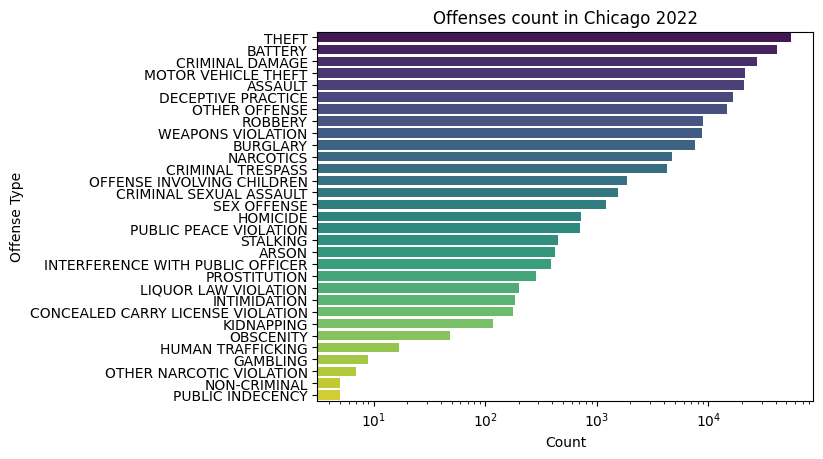

In [5]:
axis = sns.barplot(crime_total, x='Count', y='Primary Type', palette='viridis')
axis.set_xscale('log')
axis.set_ylabel('Offense Type')
axis.set_title('Offenses count in Chicago 2022')

### Observation

There are crimes in huge numbers as Theft, Battery, Criminal Damage etc. to as low as Gambling, Public Indecency. This leads to various questions:

1. What are the top 5 crimes per district?
2. Is there a correlation between the type of crime and arrest made?
3. Are there any specific districts which are crime hotspots? Any specific crimes that occur?
4. For any arrest made, is there a correlation between the type of crime and the ethnicity of the offender?

## Top 5 crimes per district

In [6]:
crimes_per_district = crimes_occurred.groupby(['Police Districts', 'Primary Type']).size().reset_index(name='Count')
crimes_per_district

,Police Districts,Primary Type,Count
0,1.0,ARSON,11
1,1.0,ASSAULT,554
2,1.0,BATTERY,1105
3,1.0,BURGLARY,312
4,1.0,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
586,25.0,ROBBERY,336
587,25.0,SEX OFFENSE,36
588,25.0,STALKING,11
589,25.0,THEFT,1111


In [7]:
crimes_per_district = crimes_per_district.sort_values(by=['Police Districts', 'Count'], ascending=[True, False])
crimes_per_district['Police Districts'] = crimes_per_district['Police Districts'].astype(int)
top_5_district_crimes = crimes_per_district.groupby('Police Districts').head(5)
top_5_district_crimes

,Police Districts,Primary Type,Count
24,1,THEFT,1829
2,1,BATTERY,1105
5,1,CRIMINAL DAMAGE,819
1,1,ASSAULT,554
8,1,DECEPTIVE PRACTICE,532
...,...,...,...
569,25,BATTERY,1721
589,25,THEFT,1111
571,25,CRIMINAL DAMAGE,1042
581,25,MOTOR VEHICLE THEFT,903


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

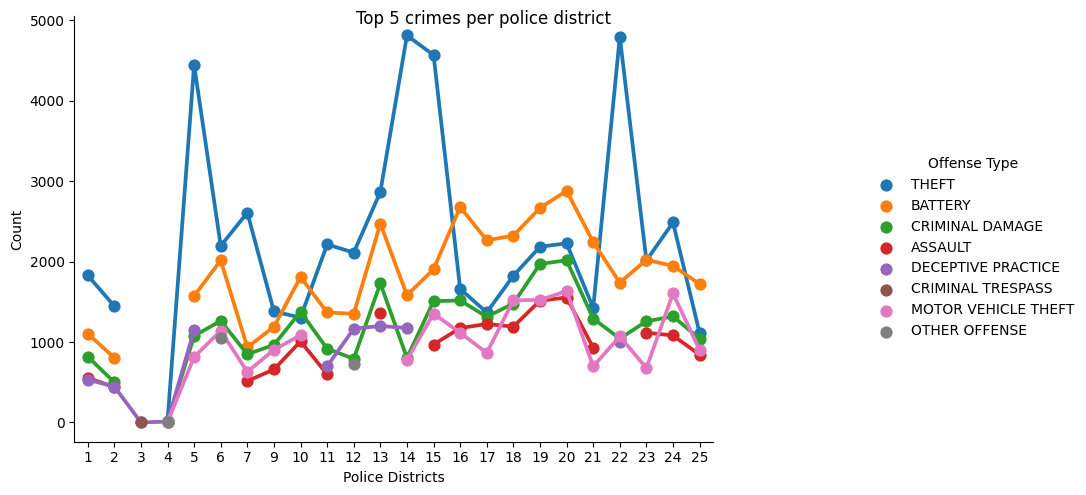

In [8]:
axis = sns.catplot(top_5_district_crimes, y='Count', x='Police Districts', hue='Primary Type', kind='point')
axis.figure.set_figwidth(12)
axis.figure.suptitle('Top 5 crimes per police district')
legendObj = axis.legend
legendObj.set_title('Offense Type')

### Observation

- As observed from before, Theft count is the highest, peaking in certain Police Districts. These districts can be considered as hotspots for crimes. We would need further analysis as to the motivation behind such high number of crimes occuring in 2022.

- Almost no crimes happened in District 3 and 4 in 2022? There can be 2 possible cases for a result like this - 
    1. Almost no crimes did occur in those districts
    2. No crimes were reported by the citizens to the police in those districts

    This can be determined by looking at previous years crime data and see if there is a big difference between previous years' crime data and this data

## Correlation between arrest made and type of crime

In [9]:
arrest_crime = crimes_occurred.loc[:, ['Arrest', 'Primary Type']].groupby(['Primary Type', 'Arrest']).size().reset_index(name='count')
arrest_crime

,Primary Type,Arrest,count
0,ARSON,False,385
1,ARSON,True,37
2,ASSAULT,False,18796
3,ASSAULT,True,2007
4,BATTERY,False,34999
...,...,...,...
56,STALKING,True,28
57,THEFT,False,52827
58,THEFT,True,2015
59,WEAPONS VIOLATION,False,3385


In [10]:
arrest_crime['total'] = arrest_crime.groupby('Primary Type')['count'].transform('sum')
arrest_crime['percent'] = (arrest_crime['count']/ arrest_crime['total']) * 100
arrest_crime

,Primary Type,Arrest,count,total,percent
0,ARSON,False,385,422,91.232227
1,ARSON,True,37,422,8.767773
2,ASSAULT,False,18796,20803,90.352353
3,ASSAULT,True,2007,20803,9.647647
4,BATTERY,False,34999,40922,85.526123
...,...,...,...,...,...
56,STALKING,True,28,447,6.263982
57,THEFT,False,52827,54842,96.325809
58,THEFT,True,2015,54842,3.674191
59,WEAPONS VIOLATION,False,3385,8775,38.575499


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

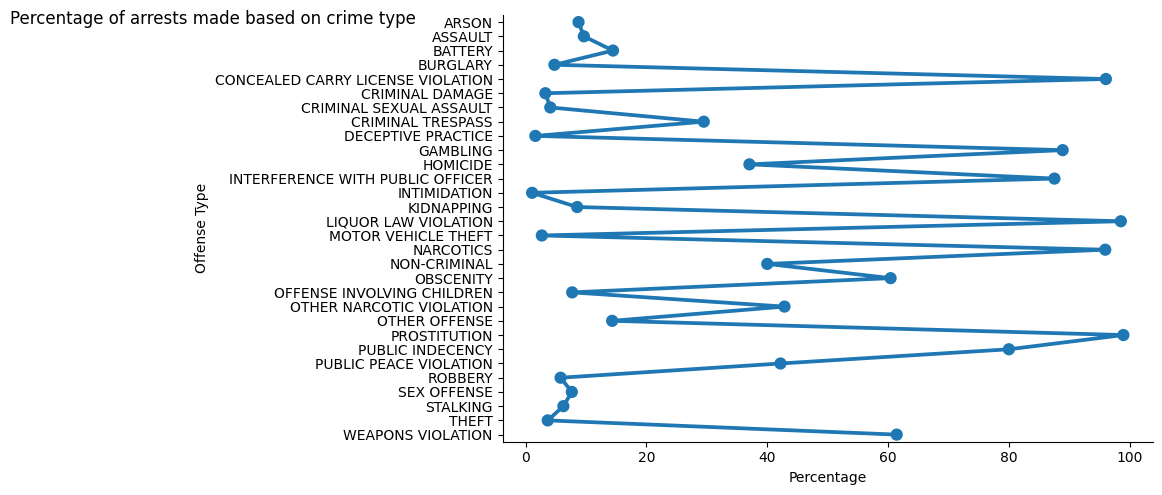

In [11]:
axis = sns.catplot(arrest_crime[arrest_crime['Arrest']==True], y='Primary Type', x='percent', kind='point')
axis.figure.set_figwidth(20)
axis.figure.suptitle('Percentage of arrests made based on crime type')
axis.set_axis_labels('Percentage', 'Offense Type')

### Observation

- Even though Theft is leading in number of crimes committed, almost none of the offenders are arrested. This may be due to various factors such as type of Theft that occurred, the socio-economic status of the area that the crime occurred, or even the offender is never caught etc. We can further dive into the different types of Theft cases that occurred and determine for what crime exactly does a person get arrested.
- Certain crimes results in almost always in an arrest. Such crimes are Liquor Law Violation, Concealed Carry License Violation, Prostitution etc. Even though they may be low in number, they do lead to an arrest. 

# Predicting if an arrest was made based on various factors

In [12]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Selecting features - Primary Type, Domestic, Location Description, Police Districts
Target label - Arrest

In [15]:
dt_df = crimes_occurred.loc[:, ['Primary Type', 'Arrest', 'Domestic', 'Location Description', 'Police Districts']]
print(f'Total number of rows: {dt_df.shape[0]}')
dt_df.head(5)

Total number of rows: 239028


,Primary Type,Arrest,Domestic,Location Description,Police Districts
0,WEAPONS VIOLATION,False,False,RESIDENCE - YARD (FRONT / BACK),NaN
1,BATTERY,False,True,APARTMENT,25.0
2,MOTOR VEHICLE THEFT,False,False,ALLEY,11.0
3,ASSAULT,True,False,STREET,9.0
4,WEAPONS VIOLATION,True,False,APARTMENT,9.0


Dropping NaN values

In [16]:
dt_df = dt_df.dropna()
print(f'Total number of rows after dropping NaN values: {dt_df.shape[0]}')
dt_df.head(5)

Total number of rows after dropping NaN values: 231749


,Primary Type,Arrest,Domestic,Location Description,Police Districts
1,BATTERY,False,True,APARTMENT,25.0
2,MOTOR VEHICLE THEFT,False,False,ALLEY,11.0
3,ASSAULT,True,False,STREET,9.0
4,WEAPONS VIOLATION,True,False,APARTMENT,9.0
5,OTHER OFFENSE,False,False,APARTMENT,25.0


### Feature Transformation
Changing dtypes to category for one-hot encoding

In [17]:
dt_df['Primary Type'] = dt_df['Primary Type'].astype('category')
dt_df['Location Description'] = dt_df['Location Description'].astype('category')
dt_df['Police Districts'] = dt_df['Police Districts'].astype('category')
dt_df.dtypes

Primary Type            category
Arrest                      bool
Domestic                    bool
Location Description    category
Police Districts        category
dtype: object

In [18]:
x, y = dt_df.loc[:, ['Primary Type', 'Domestic', 'Location Description', 'Police Districts']], dt_df['Arrest']

In [19]:
x_encoded = pd.get_dummies(x, columns=['Primary Type', 'Location Description', 'Police Districts'])
x_encoded.head(5)

,Domestic,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,...,Police Districts_16.0,Police Districts_17.0,Police Districts_18.0,Police Districts_19.0,Police Districts_20.0,Police Districts_21.0,Police Districts_22.0,Police Districts_23.0,Police Districts_24.0,Police Districts_25.0
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=15)

In [21]:
dt_clf = DecisionTreeClassifier(random_state=15)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=15)

In [22]:
y_pred = dt_clf.predict(x_test)

In [23]:
metrics.accuracy_score(y_test, y_pred)

0.9163897878460985

In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95     61587
        True       0.74      0.42      0.53      7938

    accuracy                           0.92     69525
   macro avg       0.83      0.70      0.74     69525
weighted avg       0.91      0.92      0.91     69525



Using cross-validation to check overfitting

In [34]:
cvs = cross_val_score(dt_clf, x_train, y_train, cv=10, n_jobs=-1)
cvs

array([0.91468902, 0.91173026, 0.91419589, 0.91653825, 0.91659475,
       0.91086179, 0.91295771, 0.91345087, 0.91369745, 0.91671804])

In [35]:
cvs.mean()

0.914143403073455

# Reflection

- What is the most challenging part of the project that you’ve encountered so far?
    - Dealing with huge datasets. Just crimes record of Chicago 2022 was nearly 230k records
- What are your initial insights?
    - There seems to be certain hotspots for different types of crimes. There are also cases where districts have virtually no crime (due to the crimes not being reported or other factors). It also seems that there is a certain logic to how arrests are made based on factors like the type of crime committed, location of crime, district in which the crime was committed etc. This model can be further finetuned by looking at the arrest record and checking for offenders' ethnicity, education background etc.
- Are there any concrete results you can show at this point? If not, why not?
    - Mainly if an offender is arrested or not
- Going forward, what are the current biggest problems you’re facing?
    - Data integration. Different kinds of datasets selected are not available for all years of data. For example, public school progress report dataset is only present for 2014. 
- Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - Yes, we are on track with our project. 
- Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
    - Yes, there are innumerable amounts of inferences that can be unearthed from the project. We have barely scratched the surface with our analysis. Going forward, we plan to do integrated analysis with datasets to determine correlations between different datapoints. We also plan to do statistical analysis on the same. Furthermore, we plan to finetune our models to predict more accurately.

# Further analysis

### Analyzing whether there is a correlation between arrests made and the offender's ethnivity

In [4]:
arrests = pd.read_csv('data/Arrests_2022.csv')
arrests.head(5)

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,CHARGE 4 CLASS,CHARGES STATUTE,CHARGES DESCRIPTION,CHARGES TYPE,CHARGES CLASS,Boundaries - ZIP Codes,Community Areas,Zip Codes,Census Tracts,Wards
0,30205200,JG100062,12/31/2022 11:35:00 PM,BLACK,720 ILCS 5.0/12-3.2-A-1,DOMESTIC BATTERY/BODILY HARM,M,A,NaN,NaN,...,NaN,720 ILCS 5.0/12-3.2-A-1 | | |,DOMESTIC BATTERY/BODILY HARM | | |,M | | |,A | | |,NaN,NaN,NaN,NaN,NaN
1,30205173,JG100087,12/31/2022 11:55:00 PM,BLACK,720 ILCS 5.0/21-1-A-1,CRIM DAMAGE TO PROPERTY <$500,M,A,720 ILCS 5.0/31-1-A,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR,...,A,720 ILCS 5.0/21-1-A-1 | 720 ILCS 5.0/31-1-A | ...,CRIM DAMAGE TO PROPERTY <$500 | RESISTING/OBST...,M | M | M | M,A | A | A | A,NaN,NaN,NaN,NaN,NaN
2,30205172,JG100041,12/31/2022 11:51:00 PM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,720 ILCS 5.0/31-1-A,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR,...,NaN,720 ILCS 5.0/12-3-A-1 | 720 ILCS 5.0/31-1-A | ...,BATTERY - CAUSE BODILY HARM | RESISTING/OBSTRU...,M | M | |,A | A | L |,NaN,NaN,NaN,NaN,NaN
3,30205158,JF529179,12/31/2022 09:59:00 PM,WHITE,625 ILCS 5.0/4-104-A-4,POSS TITLE/REGISTRATION NOT AUTHORIZED ON VEHICLE,M,A,NaN,NaN,...,NaN,625 ILCS 5.0/4-104-A-4 | | |,POSS TITLE/REGISTRATION NOT AUTHORIZED ON VEHI...,M | | |,A | | |,NaN,NaN,NaN,NaN,NaN
4,30205155,JF529184,12/31/2022 09:35:00 PM,BLACK,720 ILCS 5.0/9-1-A-1,MURDER - FIRST DEGREE,F,M,NaN,NaN,...,NaN,720 ILCS 5.0/9-1-A-1 | | |,MURDER - FIRST DEGREE | | |,F | | |,M | | |,NaN,NaN,NaN,NaN,NaN


In [34]:
crimes_arrest_eth = pd.merge(arrests, crimes_occurred, left_on='CASE NUMBER', right_on='Case Number', how='inner')
crimes_arrest_eth.head(5)

,CB_NO,CASE NUMBER,ARREST DATE,RACE,CHARGE 1 STATUTE,CHARGE 1 DESCRIPTION,CHARGE 1 TYPE,CHARGE 1 CLASS,CHARGE 2 STATUTE,CHARGE 2 DESCRIPTION,...,Location,Historical Wards 2003-2015,Zip Codes_y,Community Areas_y,Census Tracts_y,Wards_y,Boundaries - ZIP Codes_y,Police Districts,Police Beats,Wards 2023-
0,30205200,JG100062,12/31/2022 11:35:00 PM,BLACK,720 ILCS 5.0/12-3.2-A-1,DOMESTIC BATTERY/BODILY HARM,M,A,NaN,NaN,...,"(41.682339216, -87.649359842)",45.0,22212.0,50.0,642.0,22.0,13.0,10.0,220.0,21.0
1,30205173,JG100087,12/31/2022 11:55:00 PM,BLACK,720 ILCS 5.0/21-1-A-1,CRIM DAMAGE TO PROPERTY <$500,M,A,720 ILCS 5.0/31-1-A,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0
2,30205172,JG100041,12/31/2022 11:51:00 PM,BLACK,720 ILCS 5.0/12-3-A-1,BATTERY - CAUSE BODILY HARM,M,A,720 ILCS 5.0/31-1-A,RESISTING/OBSTRUCT/PC OFF/CORR EMP/FRFTR,...,"(41.722403798, -87.664770686)",33.0,22212.0,71.0,627.0,42.0,59.0,9.0,245.0,19.0
3,30205158,JF529179,12/31/2022 09:59:00 PM,WHITE,625 ILCS 5.0/4-104-A-4,POSS TITLE/REGISTRATION NOT AUTHORIZED ON VEHICLE,M,A,NaN,NaN,...,"(41.902823151, -87.707549295)",10.0,4299.0,24.0,455.0,49.0,5.0,16.0,65.0,26.0
4,30205155,JF529184,12/31/2022 09:35:00 PM,BLACK,720 ILCS 5.0/9-1-A-1,MURDER - FIRST DEGREE,F,M,NaN,NaN,...,"(41.673293293, -87.640557406)",45.0,21861.0,50.0,60.0,22.0,19.0,10.0,218.0,21.0


In [36]:
crimes_arrest_eth = crimes_arrest_eth.loc[:, ['Primary Type', 'RACE']]
crimes_arrest_eth.head(5)

,Primary Type,RACE
0,BATTERY,BLACK
1,ASSAULT,BLACK
2,BATTERY,BLACK
3,OTHER OFFENSE,WHITE
4,HOMICIDE,BLACK


In [37]:
crimes_arrest_eth = crimes_arrest_eth.groupby(['RACE', 'Primary Type']).size().reset_index(name='Count')
crimes_arrest_eth.head(5)

,RACE,Primary Type,Count
0,AMER INDIAN / ALASKAN NATIVE,BATTERY,4
1,AMER INDIAN / ALASKAN NATIVE,MOTOR VEHICLE THEFT,1
2,AMER INDIAN / ALASKAN NATIVE,PUBLIC PEACE VIOLATION,1
3,AMER INDIAN / ALASKAN NATIVE,THEFT,2
4,AMER INDIAN / ALASKAN NATIVE,WEAPONS VIOLATION,1


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

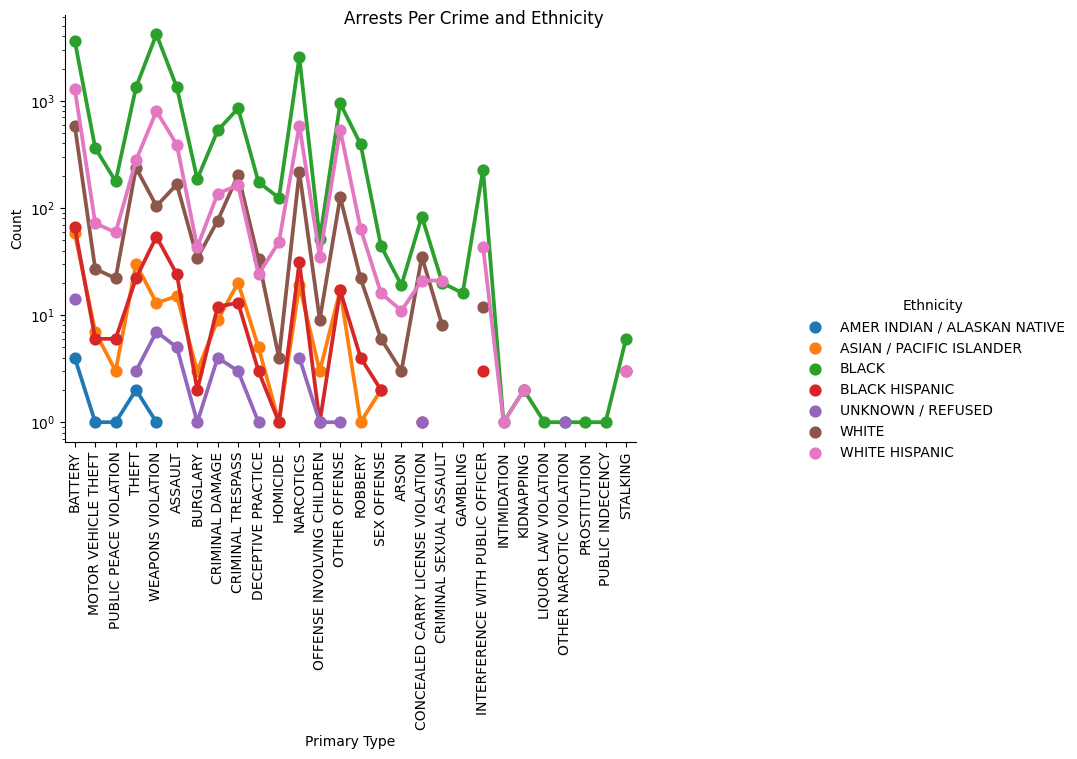

In [55]:
axis = sns.catplot(crimes_arrest_eth, y='Count', x='Primary Type', hue='RACE', kind='point')
axis.figure.set_figwidth(12)
axis.set_xticklabels(rotation=90)
axis.set(yscale='log')
axis.figure.suptitle('Arrests Per Crime and Ethnicity')
legendObj = axis.legend
legendObj.set_title('Ethnicity')

#### Observations

- Most obvious observation is that people from Black ethnicity have the most arrests in most of the crimes. This is followed White Hispanic and White ethinicity people.
- There is a trend of people from Black ethnicity having the most arrests in crimes related to Battery, Weapons Violations etc. by far as compared to other ethnicities in total